# Praca domowa 2 Marcin Wilk#

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
df=pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Wstęp do uczenia maszynowego\\Dane\\allegro-api-transactions.csv")

In [3]:
df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

## 1. Kodowanie zmiennych kategorycznych

In [5]:
import category_encoders as ce

### Target encoder

Jako że target encoding jest mocno zależny od rozkładu zmiennej target, sprawdźmy czy nasza zmienna **price** nie posiada jakiegoś "patologicznego" rozkładu.

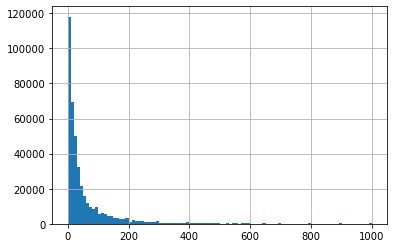

In [6]:
(df["price"])[df["price"]<1000].hist(bins=100)

Rozkład wydaje się być ciągły, przypomina wykładniczy.

In [7]:
df["it_location"].value_counts()

Warszawa                          23244
Kraków                            15135
Łódź                              10935
Poznań                            10610
Wrocław                            8646
                                  ...  
Aschering                             1
KRAKÓW                                1
Szczecin Sopot Poznań Katowice        1
kluszkowce                            1
Jezowe                                1
Name: it_location, Length: 10056, dtype: int64

Jak widzimy mamy bardzo wiele kategorii w naszej zmiennej **it_location**. Możliwe jednak, że niektóre miasta zostały napisane z małych liter albo w dziwnych formatach. Z tego powodu spróbujemy połączyć je w szersze klasy tak by miasta zapisane np. w postaciach Warszawa warszawa Warszawa-Mokotów były traktowane po prostu jako jedno miejsce - warszawa.

In [8]:
df["it_location"]=df["it_location"].apply(lambda x: x.lower())

In [9]:
lokacje=df["it_location"].value_counts()
lokacje

warszawa                       27042
kraków                         16581
łódź                           12433
poznań                         11197
internet                       10992
                               ...  
nowa wieś komorów                  1
stargard wrocław warszawa          1
przemyśl - orły -  jarosław        1
kokotów                            1
pisarzowice/wrocław                1
Name: it_location, Length: 7903, dtype: int64

Widzimy, że prosty zabieg zapisu całej nazwy z małych liter zmniejszył nam liczbę różnych miejsc aż o ponad 2 tysiące. 

One-hot encoding wyprodukowałby nam w tym przypadku prawie 8000 nowych kolumn, co jest oczywiście bardzo niepożądane, więc tutaj przewagę ma target encoding. Spróbujemy zatem target encodingu przyjmując jako target zmienną price.

In [10]:
encoder = ce.TargetEncoder()
df["it_location_encoded"] = encoder.fit_transform(df["it_location"], df["price"])

In [11]:
df[["it_location","it_location_encoded"]]

,it_location,it_location_encoded
0,warszawa,84.132898
1,warszawa,84.132898
2,leszno,64.883187
3,wola krzysztoporska,35.433365
4,białystok,73.772916
...,...,...
420015,kraśnik,26.346402
420016,dzierżoniów,63.645927
420017,supraśl,18.682800
420018,poznań,104.254805


In [12]:
df["it_location_encoded"].value_counts()

84.132898     27042
76.819205     16581
58.276109     12433
104.254805    11197
68.376518     10992
              ...  
22.105250         2
34.913396         2
129.581827        2
26.396564         2
174.180055        2
Name: it_location_encoded, Length: 5142, dtype: int64

Porównując to z poprzednią tabelką value_counts można zauważyć, że znacznie zmiejszyła nam się liczba różnych wartości w porównaniu do stanu sprzed kodowania. Jest prawie 3000 różnych wartości mniej, co oznacza, że niektóre klasy zostały połączone i zakodowane jako jedna, co sprawia, że teraz osobne kategorie są z punktu widzenia algorytmu nierozróżnialne, w przeciwieństwie do one-hot encoding, gdzie zawsze nasze kodowanie będzie bijekcją. Jest to niewątpliwie minusem target encodingu, gdyż możemy przez to przeoczyć jakąś ważną informację. Stało się tak na przykład z wszystkimi klasami o liczności 1, co pokazuje, że lepiej sprawdziłby się chyba dla klas o większych licznościach, gdzie lepiej moglibyśmy estymować prawdopodobieństwa w grupach. Jednak target encoding wyprodukuje nam zawsze tylko jedną kolumnę, co sprawia, że nie przybywa nam danych w naszym zbiorze. 

### One-hot encoder


In [45]:
df["main_category"].value_counts()

Dom i Ogród                            91042
Odzież, Obuwie, Dodatki                54257
Motoryzacja                            45941
Dla Dzieci                             42107
Uroda                                  28096
Sport i Turystyka                      27532
RTV i AGD                              20341
Telefony i Akcesoria                   19805
Komputery                              14491
Zdrowie                                13166
Książki i Komiksy                      11572
Delikatesy                              8074
Gry                                     7150
Rękodzieło                              6574
Kolekcje                                6146
Przemysł                                5959
Biżuteria i Zegarki                     5808
Biuro i Reklama                         3194
Fotografia                              2381
Muzyka                                  1961
Antyki i Sztuka                         1214
Konsole i automaty                      1053
Filmy     

Widzimy, że tutaj liczba kategorii nie jest aż taka ogromna, stąd możemy zastosować one-hot encoding.

In [46]:
encoder = ce.OneHotEncoder()
encoder.fit_transform(X=df["main_category"])

,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,main_category_9,main_category_10,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420016,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
420017,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420018,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Kodowaie tylu kategorii nie trwało wcale tak długo, lecz możemy mieć i tak problemy przy przetwarzaniu tylu dodatkowych kolumn.

### Generalized Linear Mixed Model Encoder

Jest to encoder podobny do target encodera, gdyż również potrzebuje on dodatkowej zmiennej poza kodowaną na podstawie której bedzie mógł zakodować **main_category**. Działa on w ten sposób, że dla każdej kategorii liczy on regularyzowaną różnicę średniej zmiennej targetowanej na tym poziomie od średniej globalnej, a następnie koduje te kategorię jako różnicę. Zaletą tego encodingu wydaje się być solidna podstawa teoretyczna oparta na uogólnionych modelach liniowych, dzięki czemu mamy większą kontrolę nad tym jak zostaną zakodowane nasze zmienne, przykładowo nasze liczby kodujące będą z rozsądnego zakresu. Jako target zastosujemy tutaj również zmienną **price**.

In [13]:
encoder = ce.GLMMEncoder()
df["main_category_GLMM"] = encoder.fit_transform(X=df["main_category"],y=df["price"])

In [14]:
df["main_category_GLMM"].value_counts()

-2.134077     91042
 1.285284     54257
 59.747451    45941
-3.357745     42107
-46.304636    28096
 20.548373    27532
 32.828761    20341
 6.764244     19805
 46.968712    14491
-31.661761    13166
-49.188465    11572
-54.748067     8074
-33.201435     7150
-66.407798     6574
-29.307974     6146
 4.239813      5959
-19.189969     5808
-40.007215     3194
 64.154684     2381
-36.117471     1961
 31.520961     1214
 67.815489     1053
-38.126565     1005
 59.993116      617
 48.589430      413
 7.018303       119
-1.721442         2
Name: main_category_GLMM, dtype: int64

Kodowanie zajęło chwilę dłużej niż one-hot, ale jak widzimy otrzymaliśmy tylko jedną nową kolumnę. Przeglądając powyższą tabelkę i porównując liczności zakodowanych kategorii widzimy, że jest to kodowanie bijekcyjne.

### Count Encoder

Jest to bardzo prosty sposób kodowania, polega na przypisaniu każdej klasie jej liczności w naszym zbiorze. Patrząc na value_counts zmiennej **main_category** widzimy, że kodowanie to zadziała bez żadnego problemu, wszystkie klasy mają różne liczności. Problemy mogą pojawić się gdy kilka kategorii ma te same liczności, gdyż wtedy zostaną zakodowane jako jedna oraz gdy niektóre kategorie mają przeważające liczności nad pozostałymi, może to powodować problemy np. w clusteringu, gdyż zmienna zakodowana przez swoje duże wartości może przeważać swoim wpływem nad innymi ważnymi zmiennymi.

In [20]:
encoder = ce.CountEncoder()
df["main_category_count"] = encoder.fit_transform(X=df["main_category"])
df["main_category_count"]

0         14491
1         54257
2         91042
3         11572
4         54257
          ...  
420015    20341
420016    28096
420017    54257
420018    42107
420019    45941
Name: main_category_count, Length: 420020, dtype: int64

## Uzupełnianie braków

Ograniczę liczbe rekordów, gdyż w innym przypadku będzie się to następne 2 lata liczyć.

In [21]:
import random
ind = random.sample(range(420020),50000)

In [22]:
df=df.iloc[ind,:].reset_index(drop=True)

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
df[["it_seller_rating","price","it_quantity"]].describe()

,it_seller_rating,price,it_quantity
count,50000.000000,50000.000000,50000.000000
mean,20740.865880,76.050551,6788.914320
std,37329.868334,282.510044,23462.448546
min,-1.000000,0.000000,0.000000
25%,1594.000000,9.000000,6.000000
50%,6859.000000,24.990000,95.000000
75%,21480.000000,68.000000,932.000000
max,292074.000000,34000.000000,99999.000000


### Usunięcie it_seller_rating

In [25]:
RMSE1 = [0] * 10
for i in range(10):
    nan_ind = random.sample(range(50000),5000)
    df1 = df[["it_seller_rating","price","it_quantity"]]
    df1.iloc[nan_ind,0]= float("NaN")
    imputer = KNNImputer(n_neighbors=5, weights= "distance")
    df2 = imputer.fit_transform(df1)
    RMSE1[i] = np.sqrt(np.mean((((df["it_seller_rating"])-pd.Series(df2[:,0]))[nan_ind])**2))

In [26]:
RMSE1

[40784.81787144339,
 40597.84653760836,
 38883.76412690263,
 40543.28707528459,
 39319.61501907311,
 40542.06177049551,
 40139.74284310851,
 40550.55544929234,
 38404.68996372573,
 39368.76629720655]

In [27]:
np.std(RMSE1)

803.9011142524716

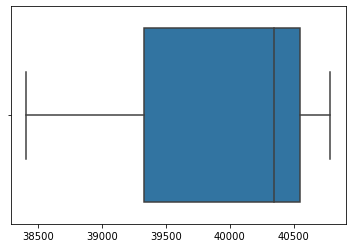

In [28]:
sns.boxplot(RMSE1)
plt.show()

Wnioski z analizy imputacji:
+ Wartości imputowane różnią się bardzo dużo od wartości oryginalnych, RMSE jest bardzo wysokie.
+ Odchylenie standardowe błędu RMSE jest całkiem duże, lecz w porównaniu do jego wartości oraz na przykład odchyleń zmiennych **it_seller_rating** oraz **it_quantity** jest ono całkiem znośne. Możemy zatem przypuszczać, że imputacja ta działa podobnie jakościowo dla każdego podzbioru danych.
+ Duże wartości RMSE mogą jednak wynikać również z tego, że nasze wejściowe zmienne mają bardzo wysokie wartości, możliwe, że przydałaby się pewna standaryzacja/skalowanie przed imputacją.

### Usunięcie it_seller_rating oraz it_quantity

In [29]:
RMSE2 = [0] * 10
RMSE3 = [0] * 10
for i in range(10):
    nan_ind1 = random.sample(range(50000),5000)
    nan_ind2 = random.sample(range(50000),5000)
    df3 = df[["it_seller_rating","price","it_quantity"]]
    df3.iloc[nan_ind1,0]= float("NaN")
    df3.iloc[nan_ind2,2]= float("NaN")
    imputer = KNNImputer(n_neighbors=5, weights= "distance")
    df4 = imputer.fit_transform(df3)
    RMSE2[i] = np.sqrt(np.mean(((df["it_seller_rating"]-pd.Series(df4[:,0]))[nan_ind1])**2))
    RMSE3[i] = np.sqrt(np.mean(((df["it_quantity"]-pd.Series(df4[:,2]))[nan_ind2])**2))

In [30]:
RMSE2

[40119.696943692834,
 40252.43065577767,
 40784.70725056786,
 42947.70486942379,
 42088.81556855198,
 40881.18887215665,
 41030.212943583494,
 39743.71495995418,
 41304.94600666953,
 40322.53680068105]

In [31]:
np.std(RMSE2)

920.7054412580552

In [32]:
RMSE3

[28610.955616215266,
 28407.813371477907,
 28961.741844984615,
 28857.670553250377,
 27337.220952276217,
 29409.154159118327,
 28116.648025687897,
 28452.35623245282,
 27729.176671160614,
 28679.123824599264]

In [33]:
np.std(RMSE3)

574.1816555313312

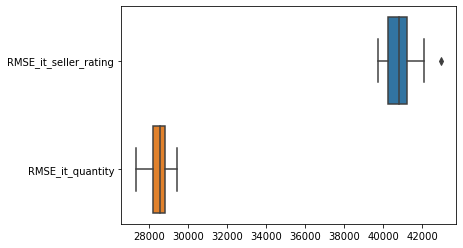

In [34]:
sns.boxplot(data=pd.DataFrame({"RMSE_it_seller_rating":RMSE2,"RMSE_it_quantity":RMSE3}),orient="h")
plt.show()

Wnioski z analizy imputacji:
+ Wartości imputowane kolejny raz różnią się bardzo dużo od wartości oryginalnych, RMSE jest bardzo wysokie dla obu zmiennych.
+ RMSE dla zmiennej **it_seller_rating** jest przeciętnie ciut większe niż w poprzednim przypadku, co jest całkiem zrozumiałe, gdyż tutaj mieliśmy braki również w innej kolumnie, co wpływa na działanie naszego algorytmu.
+ RMSE dla zmiennej **it_quantity** jest średnio prawie półtora raza mniejsze od RMSE **it_seller_rating**, jednak zmienna ta ma nominalnie większe wartości i odchylenie, stąd jej RMSE mogło wyjść sporo większe.
+ Odchylenia standardowe błędów RMSE są znowu całkiem spore, dla **it_seller_rating** jest wieksze niż w poprzednim przypadku. Dla **it_quantity** jest ono podobnego rzędu co w poprzednim przypadku. Można to wytłumaczyć tym, że przy większej ilości braków danych nasz algorytm imputuje wartości w sposób bardziej losowy, zależny od tego jakie dane akurat w danej iteracji usunęliśmy.
+ Rozkłady odchyleń obu RMSE są tym razem nieco skośne w stosunku do rozkładu normalnego.
+ Duże wartości RMSE mogą ponownie wynikać z tego, że nasze wejściowe zmienne mają bardzo wysokie wartości, możliwe, że przydałaby się pewna standaryzacja/skalowanie przed imputacją.